In [2]:
import sys
import pandas as pd
import numpy as np

print("Python:", sys.version)
print("Pandas:", pd.__version__)

Python: 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
Pandas: 2.3.3


In [3]:
from pathlib import Path

project_root = Path.cwd().parent  # because we're inside /notebooks
raw_dir = project_root / "data" / "raw"

csv_files = list(raw_dir.glob("*.csv"))
print("Found CSV files:", [f.name for f in csv_files])

assert len(csv_files) > 0, "No CSV found in data/raw. Put the dataset CSV there."


Found CSV files: ['HO_infxn_analysis.csv']


In [4]:
data_path = csv_files[0]
df = pd.read_csv(data_path)

print("Loaded:", data_path.name)
print("Shape:", df.shape)
df.head()


Loaded: HO_infxn_analysis.csv
Shape: (120279, 78)


,analysis,run,group,group_binary,group_index,deidentified_patient_id,deidentified_month,deidentified_year,dept_code,duration,...,elix_ALCOHOL,elix_AUTOIMMUNE,elix_PSYCHOSES,elix_HF,elix_RENLFL_SEV,elix_PARALYSIS,elix_LIVER_MLD,elix_VALVE,elix_NEURO_OTH,elix_CBVD
0,environmental,C_diff,control,0,1,33784,2066-02-01,2066,86,10.1,...,0,0,0,0,0,0,0,0,0,0
1,environmental,C_diff,case,1,1,32224,2078-01-01,2078,214,16.0,...,0,0,0,0,0,0,0,0,0,0
2,environmental,C_diff,control,0,2,32346,2091-10-01,2091,68,2.0,...,0,0,0,0,0,1,1,1,0,1
3,environmental,C_diff,case,1,2,27955,2017-04-01,2017,25,2.0,...,0,0,0,0,0,0,0,0,0,0
4,environmental,C_diff,control,0,3,19691,2012-04-01,2012,189,3.1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120279 entries, 0 to 120278
Data columns (total 78 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   analysis                              120279 non-null  object 
 1   run                                   120279 non-null  object 
 2   group                                 120279 non-null  object 
 3   group_binary                          120279 non-null  int64  
 4   group_index                           120279 non-null  int64  
 5   deidentified_patient_id               120279 non-null  int64  
 6   deidentified_month                    120279 non-null  object 
 7   deidentified_year                     120279 non-null  int64  
 8   dept_code                             120279 non-null  int64  
 9   duration                              120279 non-null  float64
 10  time_to_infxn                         37955 non-null   float64
 11  

In [6]:
df["group_binary"].value_counts()


group_binary
0    82324
1    37955
Name: count, dtype: int64

In [7]:
df["analysis"].value_counts()


analysis
patient          67343
environmental    52936
Name: count, dtype: int64

In [8]:
df["run"].value_counts()


run
DS_E_coli            23729
MSSA                 17218
VSE_faecalis         12987
DS_K_pneumoniae      11305
DS_P_aeruginosa       8913
MRSA                  7256
ESBL_E_coli           6840
C_diff                5125
DS_P_mirabilis        4874
DS_E_cloacae          3825
DS_K_oxytoca          3145
DS_S_marcescens       2969
DR_P_aeruginosa       2620
VSE_faecium           1999
VRE_faecium           1961
ESBL_E_cloacae        1906
ESBL_P_mirabilis      1853
ESBL_K_pneumoniae     1754
Name: count, dtype: int64

In [9]:
(
    df.groupby(["run", "group"])
      .size()
      .unstack(fill_value=0)
      .sort_values("case", ascending=False)
)


group,case,control
run,,
DS_E_coli,8161,15568
MSSA,5327,11891
VSE_faecalis,4207,8780
DS_K_pneumoniae,3427,7878
DS_P_aeruginosa,2765,6148
MRSA,2203,5053
ESBL_E_coli,2030,4810
C_diff,1686,3439
DS_P_mirabilis,1419,3455


## 1) Column inventory (what each variable represents)

In [10]:
df.columns.tolist()

['analysis',
 'run',
 'group',
 'group_binary',
 'group_index',
 'deidentified_patient_id',
 'deidentified_month',
 'deidentified_year',
 'dept_code',
 'duration',
 'time_to_infxn',
 'matching_duration',
 'age',
 'sex',
 'any_surgery',
 'any_abx_0_60',
 'penicillin_0_60',
 'extended_spectrum_penicillin_0_60',
 'anti_staph_beta_lactam_0_60',
 'cephalosporin_0_60',
 'extended_spectrum_cephalosporin_0_60',
 'carbapenem_0_60',
 'fluoroquinolone_0_60',
 'sulfonamide_0_60',
 'glycopeptide_0_60',
 'anti_Cdiff_0_60',
 'anti_anaerobe_0_60',
 'lincosamide_0_60',
 'macrolide_0_60',
 'tetracycline_0_60',
 'DS_Entero_cp',
 'ESBL_cp',
 'CDiff_cp',
 'VSE_cp',
 'VRE_cp',
 'MSSA_cp',
 'MRSA_cp',
 'DS_PsA_cp',
 'DR_PsA_cp',
 'elix_index_mortality',
 'elix_AIDS',
 'elix_LUNG_CHRONIC',
 'elix_DEMENTIA',
 'elix_DEPRESS',
 'elix_DIAB_UNCX',
 'elix_DIAB_CX',
 'elix_HTN_UNCX',
 'elix_THYROID_HYPO',
 'elix_THYROID_OTH',
 'elix_CANCER_LYMPH',
 'elix_CANCER_LEUK',
 'elix_CANCER_METS',
 'elix_OBESE',
 'elix_PERIV

In [11]:
cols = df.columns

id_cols = [c for c in cols if "id" in c.lower()] + ["group_index"]
outcome_cols = ["group", "group_binary"]
design_cols = ["analysis", "run"]  # protocol + pathogen
time_location_cols = [c for c in cols if c in ["deidentified_month", "deidentified_year", "dept_code", "duration", "time_to_infxn", "matching_duration"]]
demo_cols = [c for c in cols if c in ["age", "sex"]]
surgery_cols = [c for c in cols if "surgery" in c.lower()]
elix_cols = [c for c in cols if c.startswith("elix_")]
cp_cols = [c for c in cols if c.endswith("_cp")]
abx_cols = [c for c in cols if c.endswith("_0_60")] + [c for c in cols if c == "any_abx_0_60"]

# Remove duplicates while keeping order
def uniq(seq):
    seen = set()
    out = []
    for x in seq:
        if x in cols and x not in seen:
            out.append(x)
            seen.add(x)
    return out

id_cols = uniq(id_cols)
time_location_cols = uniq(time_location_cols)
demo_cols = uniq(demo_cols)
surgery_cols = uniq(surgery_cols)
elix_cols = uniq(elix_cols)
cp_cols = uniq(cp_cols)
abx_cols = uniq(abx_cols)

summary = {
    "design_cols": design_cols,
    "outcome_cols": outcome_cols,
    "id_cols": id_cols,
    "time_location_cols": time_location_cols,
    "demo_cols": demo_cols,
    "surgery_cols": surgery_cols,
    "elix_cols_count": len(elix_cols),
    "cp_cols_count": len(cp_cols),
    "abx_cols_count": len(abx_cols),
}

summary


{'design_cols': ['analysis', 'run'],
 'outcome_cols': ['group', 'group_binary'],
 'id_cols': ['deidentified_patient_id',
  'deidentified_month',
  'deidentified_year',
  'sulfonamide_0_60',
  'glycopeptide_0_60',
  'lincosamide_0_60',
  'macrolide_0_60',
  'elix_AIDS',
  'elix_THYROID_HYPO',
  'elix_THYROID_OTH',
  'elix_CANCER_SOLID',
  'group_index'],
 'time_location_cols': ['deidentified_month',
  'deidentified_year',
  'dept_code',
  'duration',
  'time_to_infxn',
  'matching_duration'],
 'demo_cols': ['age', 'sex'],
 'surgery_cols': ['any_surgery'],
 'elix_cols_count': 39,
 'cp_cols_count': 9,
 'abx_cols_count': 15}

In [12]:
print("Elix columns:", len(elix_cols))
print("Colonization pressure columns:", len(cp_cols))
print("Antibiotic exposure columns:", len(abx_cols))

print("\nExamples:")
print("Elix example:", elix_cols[:5])
print("CP example:", cp_cols[:5])
print("ABX example:", abx_cols[:10])


Elix columns: 39
Colonization pressure columns: 9
Antibiotic exposure columns: 15

Examples:
Elix example: ['elix_index_mortality', 'elix_AIDS', 'elix_LUNG_CHRONIC', 'elix_DEMENTIA', 'elix_DEPRESS']
CP example: ['DS_Entero_cp', 'ESBL_cp', 'CDiff_cp', 'VSE_cp', 'VRE_cp']
ABX example: ['any_abx_0_60', 'penicillin_0_60', 'extended_spectrum_penicillin_0_60', 'anti_staph_beta_lactam_0_60', 'cephalosporin_0_60', 'extended_spectrum_cephalosporin_0_60', 'carbapenem_0_60', 'fluoroquinolone_0_60', 'sulfonamide_0_60', 'glycopeptide_0_60']


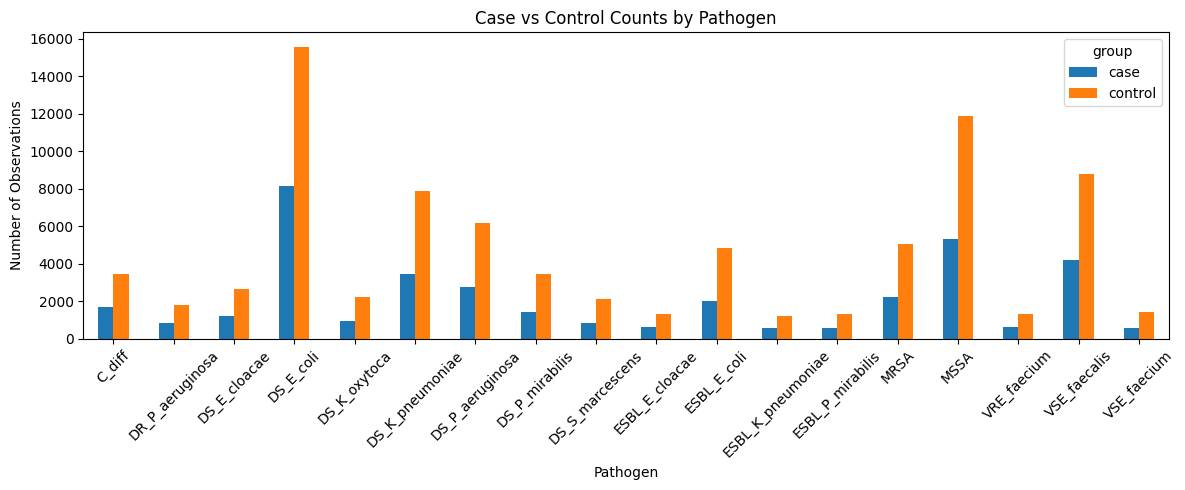

In [13]:
import matplotlib.pyplot as plt

(
    df.groupby(["run", "group"])
      .size()
      .unstack(fill_value=0)
      .plot(kind="bar", figsize=(12, 5))
)

plt.title("Case vs Control Counts by Pathogen")
plt.ylabel("Number of Observations")
plt.xlabel("Pathogen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
abx_prev = (
    df.groupby("group")[abx_cols]
      .mean()
      .T
      .sort_values(by="case", ascending=False)
)

abx_prev.head(10)


group,case,control
any_abx_0_60,0.068133,0.098708
fluoroquinolone_0_60,0.029957,0.040304
cephalosporin_0_60,0.028850,0.037668
sulfonamide_0_60,0.018838,0.023578
extended_spectrum_penicillin_0_60,0.015387,0.017577
tetracycline_0_60,0.012989,0.018694
macrolide_0_60,0.007245,0.008284
penicillin_0_60,0.005375,0.007070
anti_anaerobe_0_60,0.004347,0.004324
extended_spectrum_cephalosporin_0_60,0.002819,0.003948


In [15]:
cp_prev = (
    df.groupby("group")[cp_cols]
      .mean()
      .T
      .sort_values(by="case", ascending=False)
)

cp_prev.head(5)


group,case,control
DS_Entero_cp,13.207350,14.239525
MSSA_cp,3.916759,4.011963
ESBL_cp,3.704364,3.963369
VSE_cp,3.642011,3.796337
DS_PsA_cp,2.280351,2.399622
